In [5]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

import json


from IPython.display import Image



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.cross_validation as cross_validation
import os
import sys

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [6]:
data_direc = os.path.join( "data")
plot_direc = os.path.join("plots")
model_direc = os.path.join("models")
lane_change_models_direc = os.path.join(model_direc, "lane_changes")

Techniques are looking to generate two thing:
- an appropriate clustering technique. Do we cluster samples independently?
- generate the best features

In [53]:
import sys
sys.path.append('../')
from feature_generators import BooleanSummer, DeltaFeatureGenerator, DeltaTimeFeatureGenerator, generate_windows
def generate_features(df):
    return generate_windows(df_left, window=[1,3], relevant_features=['gz'])


In [70]:
left_dfs = []
right_dfs = []
neg_dfs = []

for subdir, dirs, files in os.walk(data_direc):
    for d in dirs:
        if d.startswith("left_") and not d.startswith("left_turn"):
            left_dfs.append(pd.read_csv("%s/fused.csv" %os.path.join(data_direc, d)))
        elif d.startswith("right_") and not d.startswith("right_turn"):
            right_dfs.append(pd.read_csv("%s/fused.csv" %os.path.join(data_direc, d)))
        elif d.startswith("neg_"):
            neg_dfs.append(pd.read_csv("%s/fused.csv" %os.path.join(data_direc, d)))

df_left = pd.concat(left_dfs, axis=0, join="outer", join_axes=None, ignore_index=True,
   keys=None, levels=None, names=None, verify_integrity=False)
df_right = pd.concat(right_dfs, axis=0, join="outer", join_axes=None, ignore_index=True,
   keys=None, levels=None, names=None, verify_integrity=False)
df_neg = pd.concat(neg_dfs, axis=0, join="outer", join_axes=None, ignore_index=True,
   keys=None, levels=None, names=None, verify_integrity=False)


In [56]:
df_ret, fets = generate_windows(df_left, window=[1,10], relevant_features=['gz'])

In [57]:
fets

['gz_10', 'gz_1', 'gz']

In [58]:

windowed_left,active_columns = generate_features(df_left)
windowed_left = windowed_left.fillna(0)
windowed_left['theta'] = df_left['theta']

windowed_right,active_columns = generate_features(df_right)
windowed_right = windowed_right.fillna(0)
windowed_right['theta'] = df_right['theta']

windowed_neg,active_columns = generate_features(df_neg)
windowed_neg = windowed_neg.fillna(0)
windowed_neg['theta'] = df_neg['theta']


In [59]:
windowed_left[active_columns]

,gz_3,gz_1,gz
0,0.026829,0.026829,0.026829
1,0.026829,0.026829,0.026829
2,0.026829,0.026829,0.026829
3,0.026829,0.026829,0.026829
4,0.026829,0.026829,0.026829
5,0.026829,0.026829,0.026829
6,0.026829,0.026829,0.026829
7,0.026829,0.026829,0.026829
8,0.026829,0.026829,0.026829
9,0.026829,0.026829,0.026829


In [60]:
def cluster_using_kmeans(df, filename, n_components=2, n_clusters=3):
    kmean = KMeans(n_clusters=n_clusters)
    Y = kmean.fit_predict(df)
    return Y

In [61]:
n_clusters=3
left_clusters = cluster_using_kmeans(windowed_left[active_columns], "", n_clusters=n_clusters)
right_clusters = cluster_using_kmeans(windowed_right[active_columns], "", n_clusters=n_clusters)
neg_clusters = cluster_using_kmeans(windowed_neg[active_columns], "", n_clusters=1)

In [62]:
c1_left = left_clusters[np.where(left_clusters!=left_clusters[0])[0][0]]

c1_right = right_clusters[np.where(right_clusters!=right_clusters[0])[0][0]]

left_clusters = np.array(map(lambda x: 0 if x == left_clusters[0] else 2 if x == c1_left else 1, left_clusters))
right_clusters = np.array(map(lambda x: 0 if x == right_clusters[0] else 2 if x == c1_right else 1, right_clusters))

In [63]:
windowed_left['class'] = left_clusters
windowed_right['class'] = right_clusters
windowed_neg['class'] = neg_clusters

In [64]:
df_train = pd.concat([windowed_left, windowed_right],ignore_index=True, join="outer")

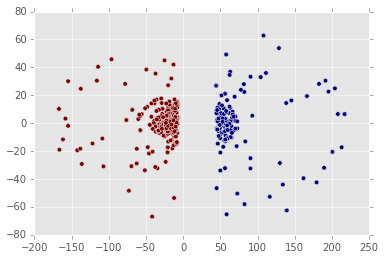

In [65]:
df_p = df_train[df_train['class'] > 0]
pca = PCA(n_components=2)
X = pca.fit_transform(df_p[active_columns])
plt.scatter(X[:,0], X[:,1], c=df_p['class'])

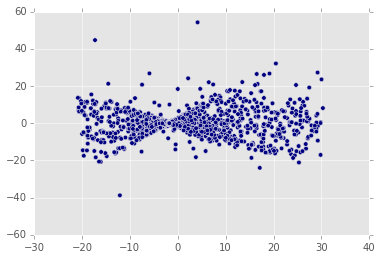

In [66]:
df_n_p = df_train[df_train['class'] == 0]
X = pca.transform(df_n_p[active_columns])
X = pca.fit_transform(df_n_p[active_columns])
plt.scatter(X[:,0], X[:,1], c=df_n_p['class'])

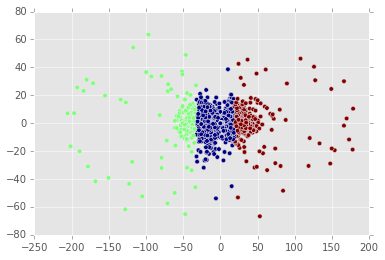

In [67]:
pca = PCA(n_components=2)
X = pca.fit_transform(df_train[active_columns])
plt.scatter(X[:,0], X[:,1], c=df_train['class'])

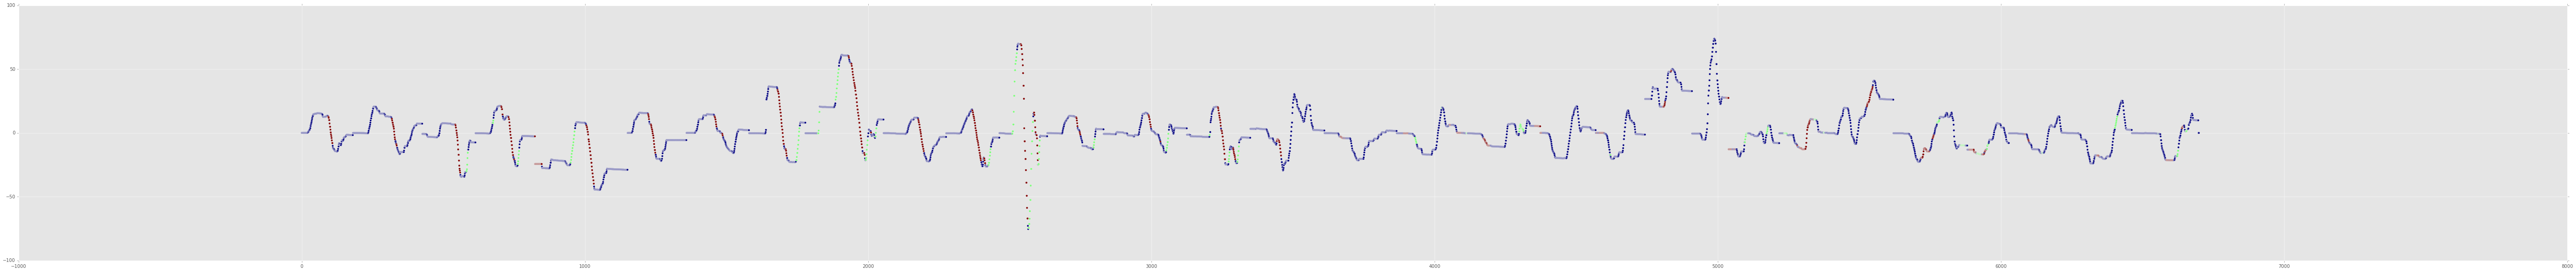

In [68]:

plt.figure(figsize=(100,10))
plt.scatter(df_train.index, df_train['theta'], c=df_train['class'])